In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:

all_data = pd.read_csv('all_data.csv')
###CLEAN UP DATA
all_data = all_data.drop('Unnamed: 0',1)#Drop Unnamed Column
all_data = all_data.dropna(how = 'any')#Drop Nan
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #Drop or
all_data ['Month'] = all_data['Order Date'].str[0:2]#Create a month col 
all_data['Month'] = all_data['Month'].astype('int32')#Month col to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [3]:
#Add a Sales Col
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [4]:
#What was the best month for sales

results = all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


<BarContainer object of 12 artists>

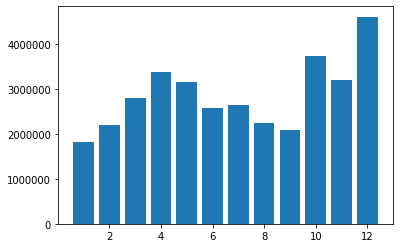

In [5]:
#Plot Results
months = range(1,13)
plt.bar(months,results['Sales'])


In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [39]:
# What cities had the highest number of sales

def get_city (address):
    return address.split(',')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' '+'(' +get_state(x)+')')

results = all_data.groupby('City').sum()

results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


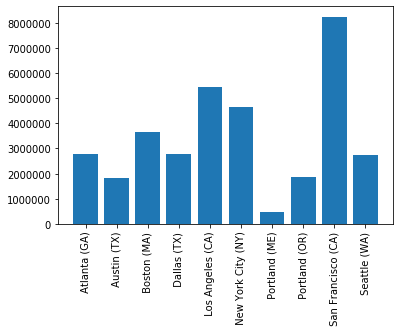

In [48]:
#Plot Results

cities = all_data['City'].unique()
cities = [cities for cities, df in all_data.groupby('City')]
plt.bar(cities,results['Sales'])
plt.xticks(rotation = 'vertical')

plt.show()

In [9]:
#What time should we display advertising?

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute



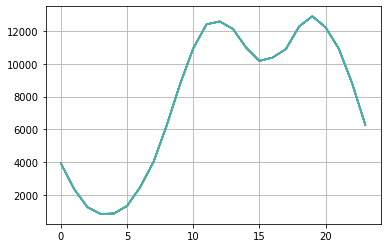

In [10]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xticks
plt.show()

In [13]:
#what products are sold more together?

